# Introduction into Exploratory Data Analysis of Youtube (EDA)

#### Importing libs

In [62]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter 
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import os  
import string

In [80]:
pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('UScomments.csv', on_bad_lines='skip')

/var/folders/yp/8t7v6p3s5855ldr9bpsdvdxr0000gn/T/ipykernel_14317/479330281.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv', on_bad_lines='skip')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [4]:
df.dropna(inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  object
 3   replies       691374 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [10]:
polarity = []
for i in df.comment_text:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
    

In [11]:
df['polarity'] = polarity

In [12]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [32]:
positive_comments = df[df.polarity == 1]
negative_comments = df[df.polarity == -1]
neutral_comments = df[df.polarity == 0]


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

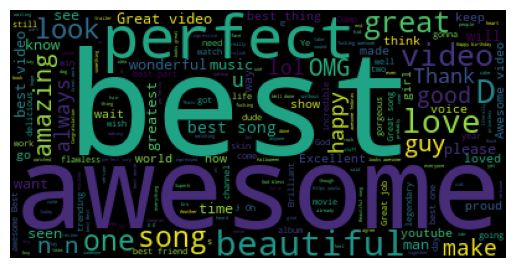

In [35]:
tot_p_com = ' '. join(positive_comments.comment_text)
wc = WordCloud(stopwords= set(STOPWORDS)).generate(tot_p_com)
plt.imshow(wc)
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

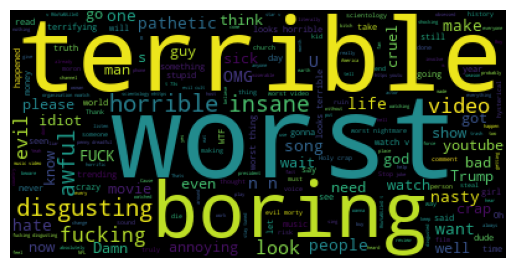

In [36]:
tot_n_com = ' '. join(negative_comments.comment_text)
wc_n = WordCloud(stopwords= set(STOPWORDS)).generate(tot_n_com)
plt.imshow(wc_n)
plt.axis('off')

## Emoji analysis

In [44]:
df.comment_text.head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [ ]:
em_list =[]
for i in df.comment_text:
    if i in emoji.EMOJI_DATA:
        em_list.append(i)

In [49]:
em_list = [i for i in df.comment_text if i in emoji.EMOJI_DATA]

In [51]:
em_list[0:5]

['👍', '❤️', '😂', '❤️', '💄']

In [78]:
emojis = [Counter(em_list).most_common(10)[i][0] for i in range(10)]
freq = [Counter(em_list).most_common(10)[i][1] for i in range(10)]

In [85]:
t = go.Bar(x = emojis, y = freq)
iplot([t])

# Big data


In [8]:
file_path = os.listdir('data')
file = [i for i in file_path if '.csv'in i]
file

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [17]:
big_df = pd.DataFrame()
for i in file:
    df1 = pd.read_csv('data/'+i, encoding = 'iso-8859-1', on_bad_lines = 'skip')

    big_df = pd.concat([df1], ignore_index = False)


In [21]:
big_df.to_csv('data/bigf_df.csv', index = False)

In [22]:
big_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [23]:
big_df.category_id.unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43])

### Most liked category

In [25]:
jason_df = pd.read_json('data/US_category_id.json')

In [28]:
jason_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [29]:
cat_dic = {}
for i in jason_df['items'].values:
    cat_dic[int(i['id'])]=i['snippet']['title']


In [32]:
big_df.category_id =  big_df.category_id.map(cat_dic)

In [33]:
big_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


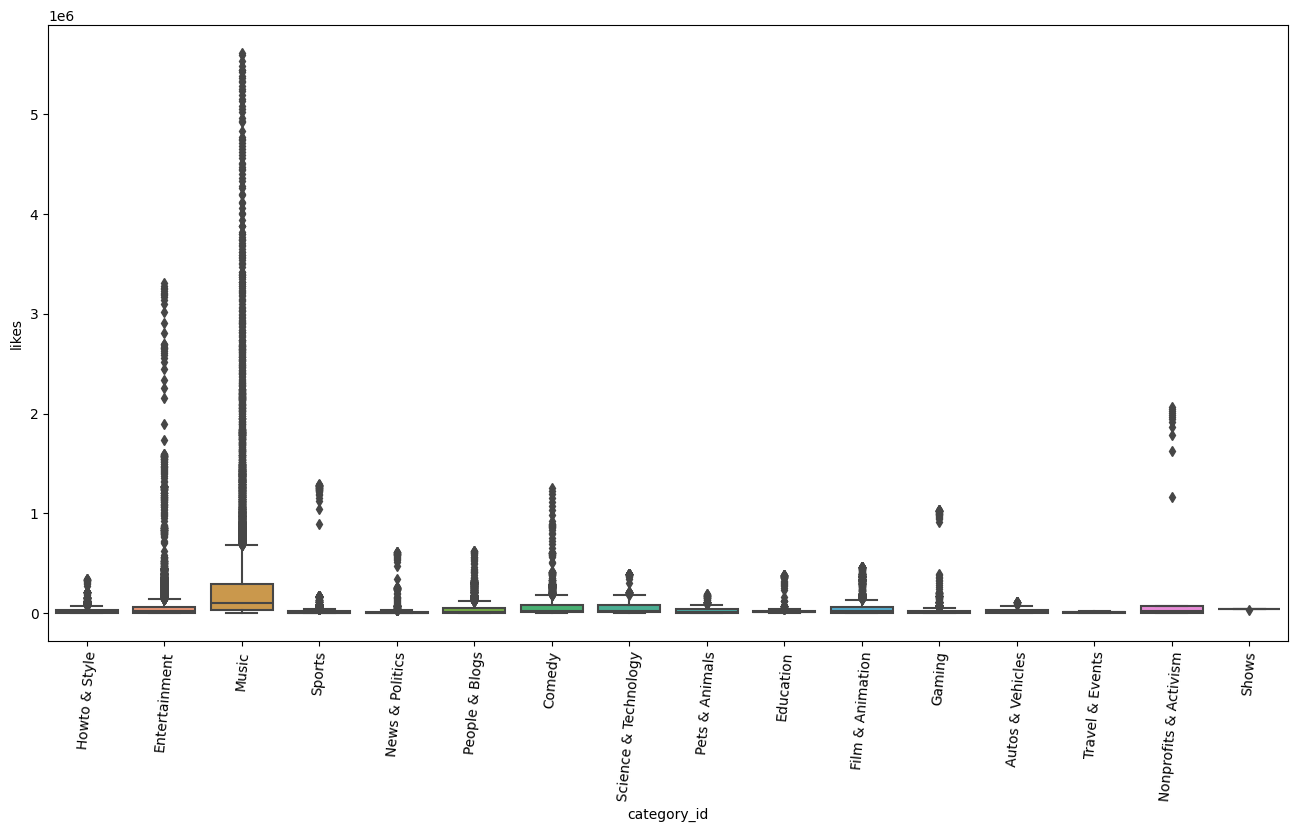

In [48]:
plt.figure(figsize= (16,8))
sns.boxplot(x = 'category_id', y = 'likes', data = big_df)
plt.xticks(rotation = 85)
plt.show()

### Audience is engaged or not whether in comments and likes and dislikes 

In [86]:
big_df['like_rate'] = (big_df.likes/big_df.views)*100
big_df['dislike_rate'] = (big_df.dislikes/big_df.views)*100
big_df['comment_count_rate'] = (big_df.comment_count/big_df.views)*100

In [45]:
big_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'like_rate', 'dislike_rate',
       'comment_count_rate'],
      dtype='object')

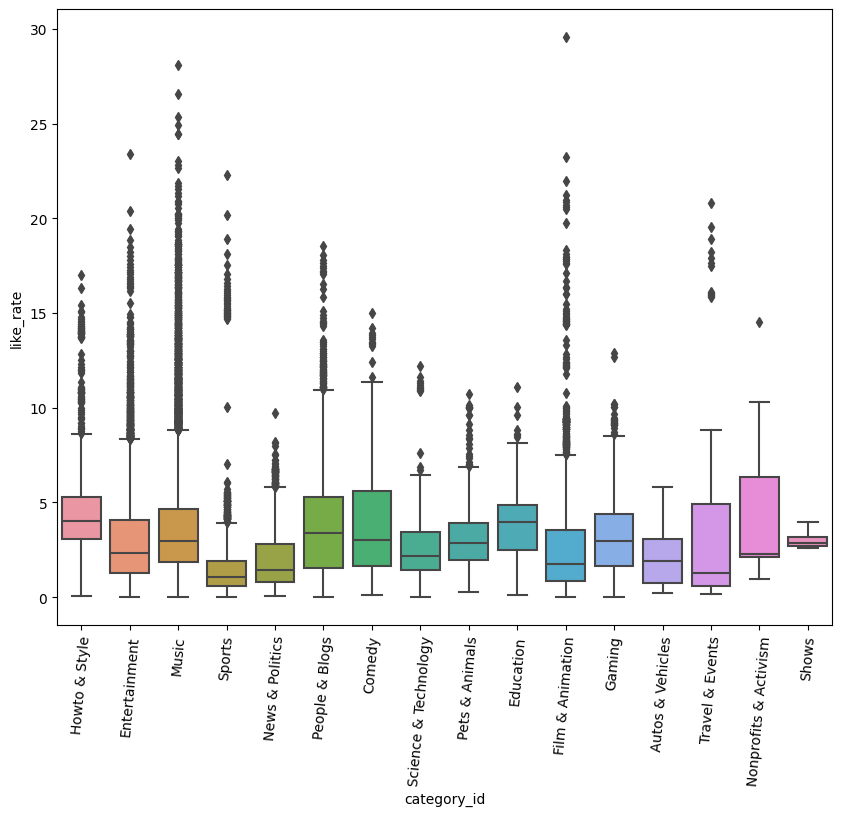

In [46]:
plt.figure(figsize= (10,8))
sns.boxplot(x = 'category_id', y = 'like_rate', data = big_df)
plt.xticks(rotation = 85)
plt.show()

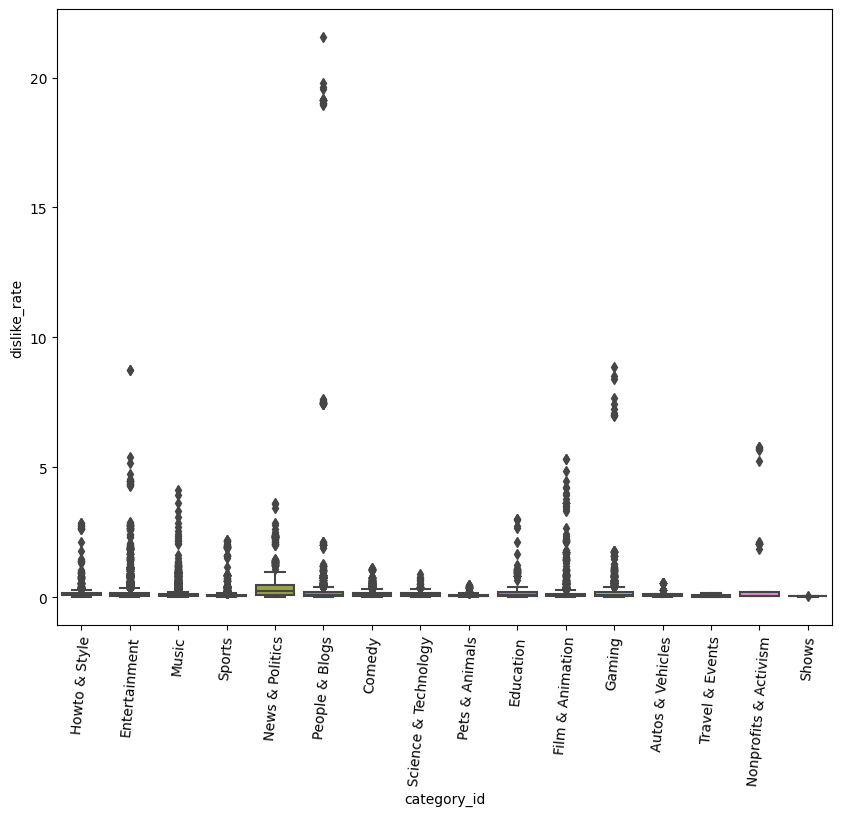

In [91]:
plt.figure(figsize= (10,8))
sns.boxplot(x = 'category_id', y = 'dislike_rate', data = big_df)
plt.xticks(rotation = 85)
plt.show()

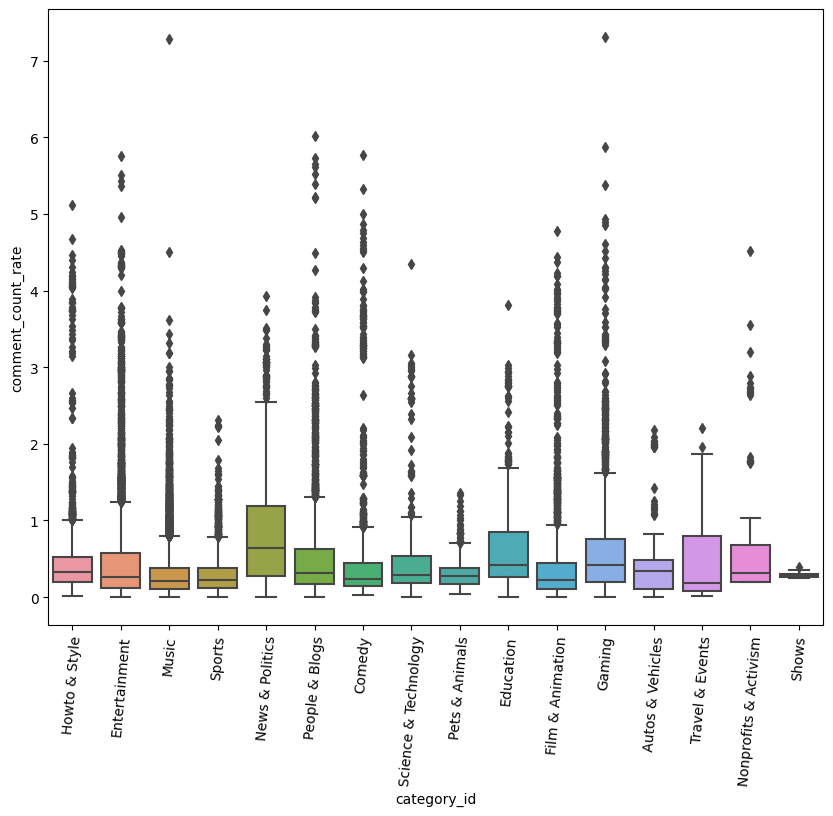

In [92]:
plt.figure(figsize= (10,8))
sns.boxplot(x = 'category_id', y = 'comment_count_rate', data = big_df)
plt.xticks(rotation = 85)
plt.show()

<Axes: xlabel='views', ylabel='likes'>

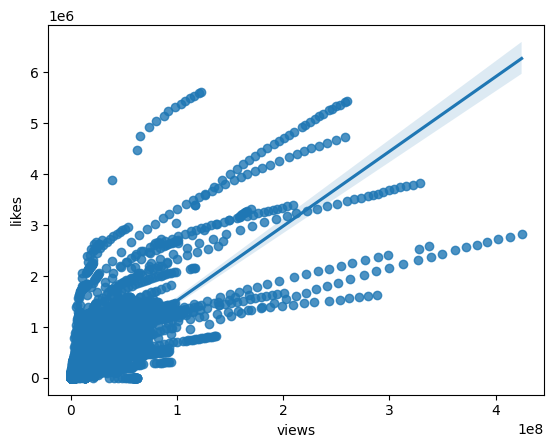

In [47]:
sns.regplot(x = 'views', y = 'likes', data = big_df)

### Trending videos on youtube

In [49]:
big_df.channel_title.value_counts()

channel_title
The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
                                         ... 
Kylo Ren                                    1
Videomusicawards                            1
Pop Blast                                   1
Dale Dai                                    1
5-Minute Crafts                             1
Name: count, Length: 1625, dtype: int64

In [52]:
channel = big_df.groupby(big_df.channel_title).size().sort_values(ascending=False).reset_index()

In [55]:
channel = channel.rename(columns={0:'total_videos'})
channel

,channel_title,total_videos
0,The Tonight Show Starring Jimmy Fallon,208
1,Jimmy Kimmel Live,207
2,TheEllenShow,207
3,Saturday Night Live,206
4,WWE,205
...,...,...
1620,Matt Steffanina,1
1621,ETC Show,1
1622,MadisonBeerMusicVEVO,1
1623,Endless Entertainment,1


In [60]:
px.bar(channel.head(20),x = 'channel_title', y = 'total_videos')

#### Does punctions have impact on views or not

In [ ]:
len([i for i in big_df.title[0] if i in string.punctuation])

3

In [81]:
def pun_count (text):
    return len([i for i in text if i in string.punctuation])

In [82]:
big_df['punt_count'] = big_df.title.apply(pun_count)

0        2
1        5
2        4
3        1
4        1
        ..
38911    4
38912    3
38913    4
38914    6
38915    5
Name: punt_count, Length: 38916, dtype: int64

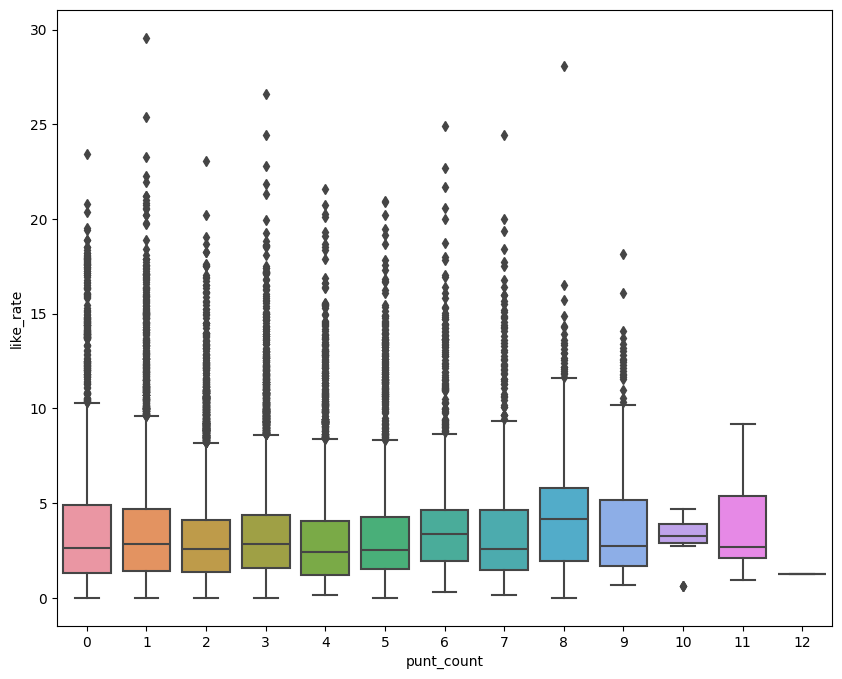

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'punt_count', y = 'like_rate', data = big_df)
plt.show()

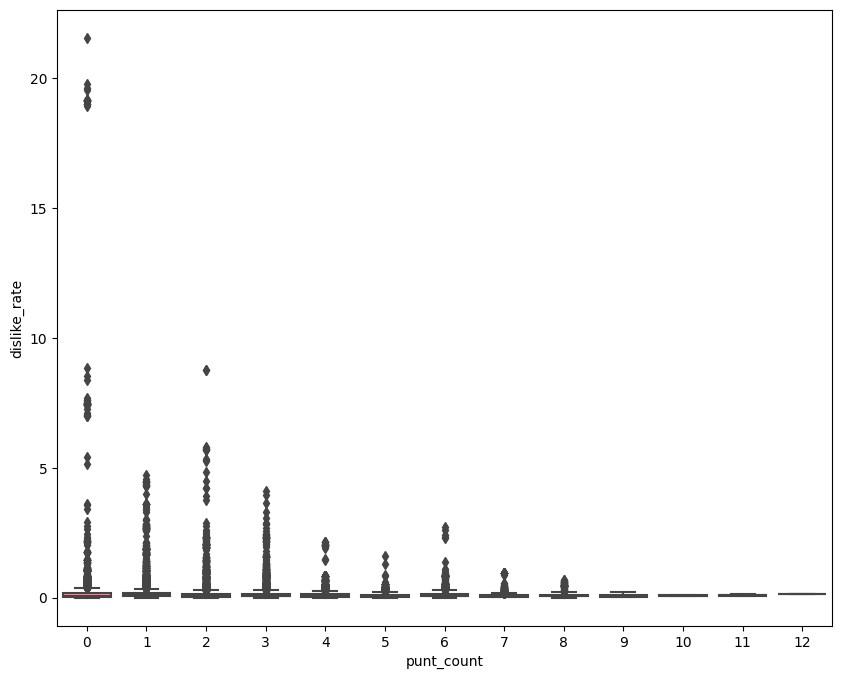

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'punt_count', y = 'dislike_rate', data = big_df)
plt.show()

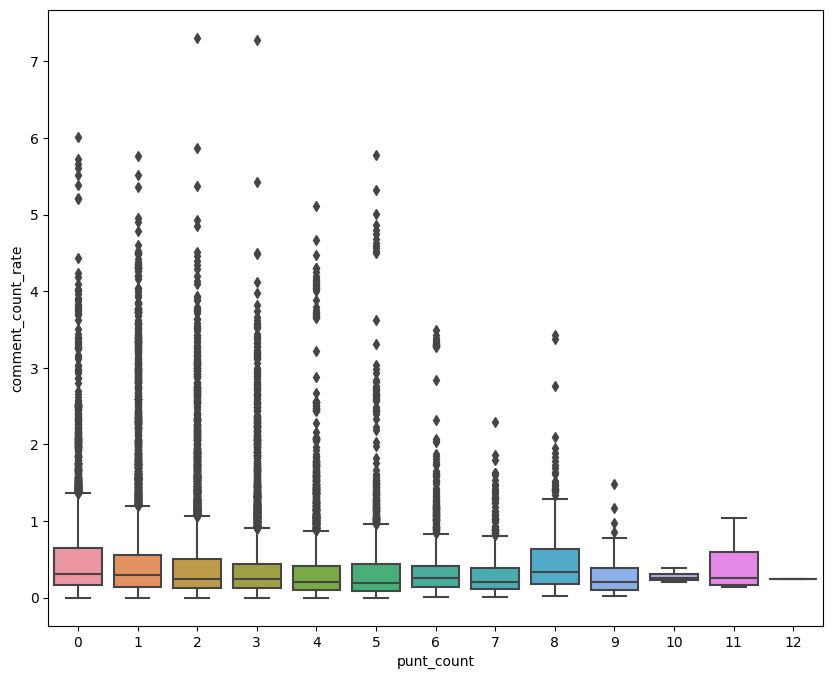

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'punt_count', y = 'comment_count_rate', data = big_df)
plt.show()